<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")

In [ ]:
import pandas as pd
tda = pd.read_csv('/titanic.csv')
tda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
tda['Sex'] = tda['Sex'].map(
                   {'female':0 ,'male':1})

In [ ]:
tda['Embarked'] = tda['Embarked'].map(
                   {'S':0 ,'C':1, 'Q':2})

In [ ]:
tda.drop(['Name', 'Age', 'Fare', 'Cabin','Ticket', 'Pclass'], axis=1)

,PassengerId,Survived,Sex,SibSp,Parch,Embarked
0,1,0,1,1,0,0.0
1,2,1,0,1,0,1.0
2,3,1,0,0,0,0.0
3,4,1,0,1,0,0.0
4,5,0,1,0,0,0.0
...,...,...,...,...,...,...
886,887,0,1,0,0,0.0
887,888,1,0,0,0,0.0
888,889,0,0,1,2,0.0
889,890,1,1,0,0,1.0


In [ ]:
tda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [ ]:
tda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
tda['Embarked'].fillna('0.0',inplace=True)

In [ ]:
tda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
tda['Embarked'].fillna('0.0',inplace=True)

In [ ]:
tda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
!pip install pycaret
from pycaret.classification import *
s = setup(data= tda, target='Survived')
cm = compare_models()

,Description,Value
0,Session id,1384
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 15)"
5,Transformed train set shape,"(623, 15)"
6,Transformed test set shape,"(268, 15)"
7,Numeric features,7
8,Categorical features,4
9,Rows with missing values,79.2%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8169,0.8575,0.6732,0.8199,0.7361,0.5984,0.6077,0.7030
ridge,Ridge Classifier,0.7382,0.0000,0.4139,0.8202,0.5442,0.3890,0.4364,0.2040
et,Extra Trees Classifier,0.7030,0.8194,0.2587,0.9163,0.3921,0.2727,0.3695,0.5810
nb,Naive Bayes,0.6582,0.7988,0.1464,0.8064,0.2415,0.1443,0.2314,0.5420
knn,K Neighbors Classifier,0.6306,0.6135,0.3594,0.5253,0.4246,0.1681,0.1750,0.2670
qda,Quadratic Discriminant Analysis,0.6196,0.0543,0.0087,0.1000,0.0160,0.0107,0.0238,0.2820
lda,Linear Discriminant Analysis,0.6196,0.5308,0.0217,0.0625,0.0323,0.0162,0.0202,0.3040
rf,Random Forest Classifier,0.6180,0.8296,0.0043,0.1000,0.0083,0.0054,0.0167,0.8200
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3310
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
tda.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
IDV = tda.loc[:, ['PassengerId', 'Sex', 'SibSp', 'Parch', 'Embarked']]
OUT = tda['Survived']
IDV.head()

,PassengerId,Sex,SibSp,Parch,Embarked
0,1,1,1,0,0.0
1,2,0,1,0,1.0
2,3,0,0,0,0.0
3,4,0,1,0,0.0
4,5,1,0,0,0.0


In [ ]:
IDV_train, IDV_test, OUT_train, OUT_test = train_test_split(IDV, OUT, test_size = 0.2, random_state = 42)

In [ ]:
IDV_train.isnull().sum()

PassengerId    0
Sex            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [ ]:
Model = LogisticRegression()

In [ ]:
Model.fit(IDV_train,OUT_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
PRED = Model.predict(IDV_train)
ACC1 = accuracy_score(PRED,OUT_train)
print('ACCURACY   >', ACC1)


ACCURACY   > 0.7921348314606742


In [ ]:
PREDTEST = Model.predict(IDV_test)
ACCTD = accuracy_score(PREDTEST,OUT_test)
print('ACCURACY on test split data    >', ACCTD)

ACCURACY on test split data    > 0.7821229050279329


In [ ]:
TestD = pd.read_csv('/titanic.csv')
TestD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
TestD['Sex'] = TestD['Sex'].map(
                   {'female':0 ,'male':1})

In [ ]:
TestD['Embarked'] = TestD['Embarked'].map(
                   {'S':0 ,'C':1, 'Q':2})

In [ ]:
TestD.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
TestD.drop(['Name', 'Age', 'Fare', 'Cabin','Ticket', 'Pclass'], axis=1)

,PassengerId,Survived,Sex,SibSp,Parch,Embarked
0,1,0,1,1,0,0.0
1,2,1,0,1,0,1.0
2,3,1,0,0,0,0.0
3,4,1,0,1,0,0.0
4,5,0,1,0,0,0.0
...,...,...,...,...,...,...
886,887,0,1,0,0,0.0
887,888,1,0,0,0,0.0
888,889,0,0,1,2,0.0
889,890,1,1,0,0,1.0


In [ ]:
predictions = Model.predict(TestD.drop([C=1.0, class_weight=None, dual=False, fit_intercept=True,], axis=1))

In [ ]:
print(Predictions)

In [ ]:
output = pd.DataFrame({'PassengerId': TestD.PassengerId, 'Survived': Predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

NameError: ignored

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

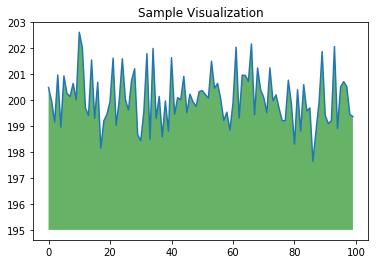

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
